#**Tomato Leaves Disease Detection using Deep Learning Technique Like EfficientNet**

##**Connecting Google Drive with Google Colab because Dataset is there on Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Checking the GPU Details**

In [2]:
!nvidia-smi

Mon Apr 17 09:14:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession
# config = ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.9
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

#**Importing Required Modules**

In [3]:
# Import Module
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [4]:
batch_size = 64
IMG_WIDTH = 224
IMG_HEIGHT = 224
CHANNELS = 3
CLASSES = 10
train_dir = '/content/drive/MyDrive/tomato/train/'
validation_dir = '/content/drive/MyDrive/tomato/val/'

##**Importing Images from Dataset with Certain Transformation before feeding for Training**

In [5]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                    rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen = image.ImageDataGenerator(preprocessing_function=preprocess_input,
                                              rescale = 1./255)

In [6]:
# Load Traning Data
train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(IMG_WIDTH,IMG_HEIGHT),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True
        )

Found 10000 images belonging to 10 classes.


In [7]:
# Load Validation Data
validation_generator = validation_datagen.flow_from_directory(
            validation_dir,
            target_size=(IMG_WIDTH,IMG_HEIGHT),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=False
        )

Found 1000 images belonging to 10 classes.


##**Model Efficientnet B0 is imported from Tensorflow Library and It is fitted by the train data and train and test accuracy is obtained**

In [8]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 10
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
device_name = tf.test.gpu_device_name()

if device_name != '/device:GPU:0':
    device_name = '/device:CPU:0'

# Build your TensorFlow model and specify the device
with tf.device(device_name):
    outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )
    model.summary()
    STEP_SIZE_TRAIN=train_generator.n // train_generator.batch_size
    STEP_SIZE_VALID=validation_generator.n  // validation_generator.batch_size
    epochs = 40
    history = model.fit_generator(train_generator,
                                steps_per_epoch=STEP_SIZE_TRAIN,
                                epochs=epochs,
                                
                                validation_data=validation_generator,
                                validation_steps=STEP_SIZE_VALID)
    test_loss, test_acc = model.evaluate_generator(validation_generator, steps=STEP_SIZE_VALID)
    print('Test loss:', test_loss)
    print('Test accuracy:', test_acc)

Default GPU Device: /device:GPU:0
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 10)               4062381   
                                                                 
Total params: 4,062,381
Trainable params: 4,020,358
Non-trainable params: 42,023
_________________________________________________________________


<ipython-input-8-d85a73c7f247>:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/40
156/156 [==============================] - 2392s 15s/step - loss: 2.1345 - accuracy: 0.3933 - val_loss: 3.0181 - val_accuracy: 0.1042
Epoch 2/40
156/156 [==============================] - 174s 1s/step - loss: 1.2966 - accuracy: 0.6215 - val_loss: 53.7587 - val_accuracy: 0.0625
Epoch 3/40
156/156 [==============================] - 199s 1s/step - loss: 0.8274 - accuracy: 0.7291 - val_loss: 20.8138 - val_accuracy: 0.0625
Epoch 4/40
156/156 [==============================] - 175s 1s/step - loss: 0.5982 - accuracy: 0.7995 - val_loss: 5.5757 - val_accuracy: 0.1583
Epoch 5/40
156/156 [==============================] - 172s 1s/step - loss: 0.4351 - accuracy: 0.8478 - val_loss: 4.1054 - val_accuracy: 0.3010
Epoch 6/40
156/156 [==============================] - 179s 1s/step - loss: 0.3454 - accuracy: 0.8812 - val_loss: 1.1182 - val_accuracy: 0.7281
Epoch 7/40
156/156 [==============================] - 184s 1s/step - loss: 0.4075 - accuracy: 0.8701 - val_loss: 2.1586 - val_accuracy: 0.

<ipython-input-8-d85a73c7f247>:32: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(validation_generator, steps=STEP_SIZE_VALID)


Test loss: 0.2737588584423065
Test accuracy: 0.9229166507720947


##**Performance Evaluation like  Accuracy,Precision,Recall,F1 Score**

In [23]:
# Generate predictions for the validation set
y_pred = model.predict_generator(validation_generator, steps=STEP_SIZE_VALID)
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape
# Get true labels for the validation set
y_true = validation_generator.classes
y_true=y_true[0:960]
# Calculate precision, recall, f1-score, and accuracy
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

# Print the results
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1-score: {:.3f}".format(f1))
print("Accuracy: {:.3f}".format(accuracy))

<ipython-input-23-df24796791b7>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(validation_generator, steps=STEP_SIZE_VALID)


Precision: 0.935
Recall: 0.923
F1-score: 0.922
Accuracy: 0.923


In [26]:
confusion_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_pred)
print(validation_generator.class_indices)
confusion_matrix

{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 95,   1,   0,   0,   1,   0,   3,   0,   0,   0],
       [  1,  84,   1,   0,   5,   0,   8,   0,   1,   0],
       [  0,   2,  97,   1,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,  87,   7,   0,   0,   0,   5,   0],
       [  0,   0,   0,   0, 100,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,  65,  27,   0,   5,   2],
       [  0,   0,   0,   0,   0,   0, 100,   0,   0,   0],
       [  1,   0,   0,   0,   0,   1,   0,  98,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 100,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  60]], dtype=int32)>

##**Ploting Loss and Accuracy Curve for training and validation data**

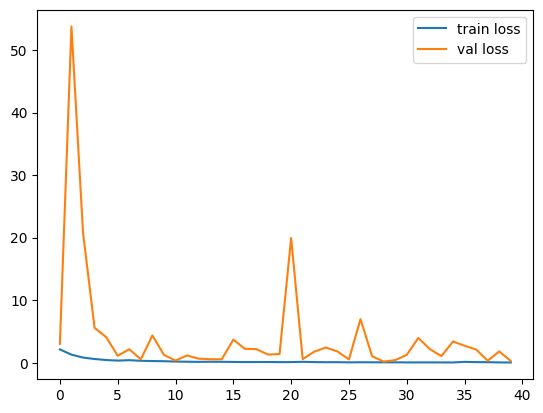

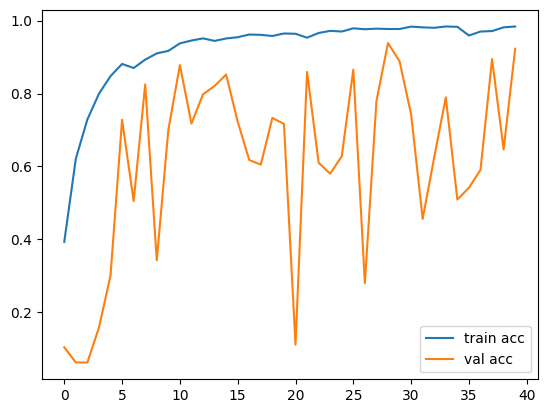

<Figure size 640x480 with 0 Axes>

In [27]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

##**Saving the model**

In [28]:
from tensorflow.keras.models import load_model
model.save('model_efficientnetb0.h5')

#**To load the EfficientNetB0 model in TensorFlow**

In [ ]:
import tensorflow as tf
# Load the saved model
model = tf.keras.models.load_model('model_efficientnetb0.h5')
# Print the model summary
model.summary()
